1) Загрузите данные по вариантам в ноутбук.

In [ ]:
import pandas as pd
df=pd.read_excel('Вариант 2.xlsx',skiprows=2, skipfooter=1)
df

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
3,4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
4,5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
...,...,...,...,...,...,...,...,...,...,...,...
2351,2352,136,11,М,337,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25,92,27
2352,2353,136,11,М,341,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25,92,27
2353,2354,136,11,М,341,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27,96,27
2354,2355,136,11,М,343,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),NaN,27,96,27


2) Сделайте описательную статистику полученных данных.

In [ ]:
df.describe()

,№,№ школы,Номер варианта,Устная часть,Первичный балл,Балл,Минимальный балл
count,2356.000000,2356.000000,2356.000000,0.0,2356.000000,2356.000000,2356.0
mean,1178.500000,132.005518,338.273769,NaN,10.123939,49.255093,27.0
std,680.262939,5.037984,53.660878,NaN,3.820484,17.880420,0.0
min,1.000000,121.000000,101.000000,NaN,1.000000,5.000000,27.0
25%,589.750000,127.000000,339.000000,NaN,7.000000,33.000000,27.0
50%,1178.500000,135.000000,342.500000,NaN,10.000000,50.000000,27.0
75%,1767.250000,136.000000,346.000000,NaN,13.000000,68.000000,27.0
max,2356.000000,137.000000,506.000000,NaN,27.000000,96.000000,27.0


3) Найдите процент учащихся, выполнивших работу ниже среднего.

In [ ]:
mean = df['Балл'].mean()
df_underrow = df[df['Балл'] < mean]
percentage_underav = df_underrow.shape[0]/df.shape[0]*100
percentage_underav

48.00509337860781

4) Найти процент учащихся не сдавших экзамен.

In [ ]:
min_ball= df[df['Балл'] < df['Минимальный балл'] ]
percentage_ne_zdali=min_ball.shape[0]/df.shape[0]*100
percentage_ne_zdali

9.210526315789473

5) Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.

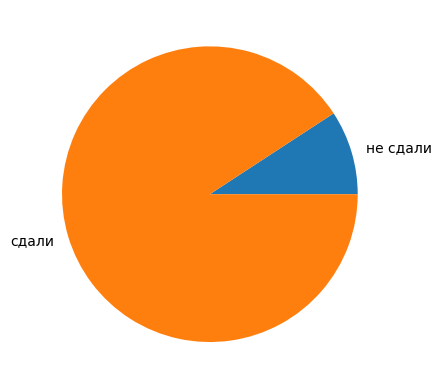

In [ ]:
import matplotlib.pyplot as plt

data=[percentage_ne_zdali,100-percentage_ne_zdali]
labels = ['не сдали','сдали']

plt.pie(data, labels=labels)

plt.show()

6) Постройте ядерную оценку плотности распределению баллов за экзамен.

<ipython-input-8-68185ccee05f>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Балл'], shade=True, color='blue')


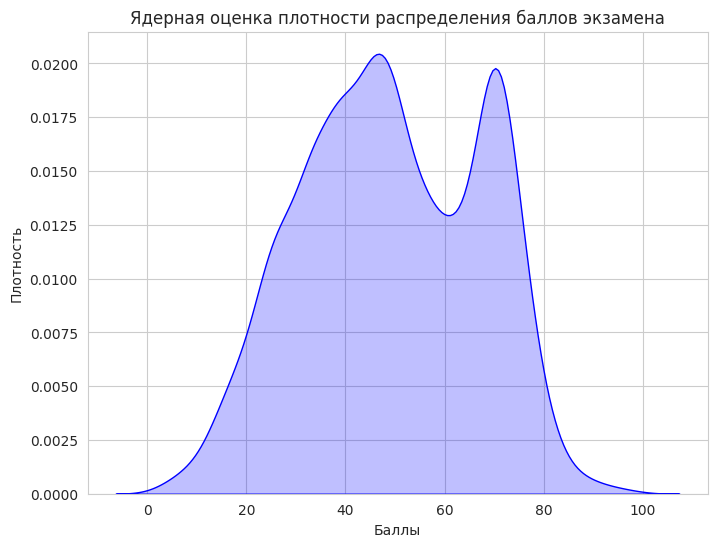

In [ ]:
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.kdeplot(df['Балл'], shade=True, color='blue')
plt.title('Ядерная оценка плотности распределения баллов экзамена')
plt.xlabel('Баллы')
plt.ylabel('Плотность')
plt.show()

7) Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

In [ ]:
def replace_func(x):
  if x<63:
    return 2
  elif x>62 and x<77:
    return 3
  elif x>76 and x<91:
    return 4
  else:
    return 5

df['Оценка'] = df.loc[:,'Балл']
df

df['Оценка'] = df['Оценка'].apply(replace_func)
df

df.groupby(['Оценка']).agg({'Оценка': 'count'})
df.groupby(['Оценка']).agg({'Оценка': 'count'})/df.shape[0]*100

,Оценка
Оценка,
2,74.405772
3,22.028862
4,3.353141
5,0.212224


8) Какое процентное соотношение юношей и девушек писало данный экзамен?

In [ ]:
df.groupby(['Пол']).agg({'Пол': 'count'})/df.shape[0]*100

,Пол
Пол,
Ж,52.843803
М,47.156197


9) Сколько школ принимало участие в экзамене?

In [ ]:
schools = df['№ школы'].nunique()

print(f"Количество школ, принявших участие: {schools}")

Количество школ, принявших участие: 17


10) Сколько всего заданий с кратким ответом? С развернутым ответом?

In [ ]:
shortAns= df.loc[0,'Задания с кратким ответом']
len(shortAns)


12

In [ ]:
longAns=df.loc[0, 'Задания с развёрнутым ответом']
int(len(longAns)/4)

7

In [ ]:
import pandas as pd
df=pd.read_excel('Вариант 2.xlsx',skiprows=2, skipfooter=1)

11) Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В
, ... Вк
 Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.

In [ ]:
for i in range(len(shortAns)):
  df.insert(len(df.columns), f'B{i+1}',0)
df

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,...,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,0,0,0,0,0,0,0,0,0,0
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,0,0,0,0,0,0,0,0,0,0
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,0,0,0,0,0,0,0,0,0,0
3,4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,0,0,0,0,0,0,0,0,0,0
4,5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2352,136,11,М,337,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25,92,...,0,0,0,0,0,0,0,0,0,0
2352,2353,136,11,М,341,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25,92,...,0,0,0,0,0,0,0,0,0,0
2353,2354,136,11,М,341,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27,96,...,0,0,0,0,0,0,0,0,0,0
2354,2355,136,11,М,343,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),NaN,27,96,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i,_ in df.iterrows():
  shortAns=df.loc[i, 'Задания с кратким ответом']
  for j in range(len(shortAns)):
    df.loc[i, f'B{j+1}'] = shortAns[j]
df

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,...,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,-,+,-,-,-,-,-
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,-,-,-,-,-,-,-
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,-,-,-,-,-,-,-
3,4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,-,-,-,-,-,-,-
4,5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,-,-,-,+,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2352,136,11,М,337,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25,92,...,+,+,+,+,+,+,+,+,+,+
2352,2353,136,11,М,341,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25,92,...,-,+,+,+,+,+,+,+,+,+
2353,2354,136,11,М,341,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27,96,...,+,+,+,+,+,+,+,+,+,+
2354,2355,136,11,М,343,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),NaN,27,96,...,+,+,+,+,+,+,+,+,+,+


In [ ]:
cols = df.loc[:,'B1':'B2'].columns
for col in cols:
  print(col, df.groupby([col]).agg({col:'count'})/ df.shape[0]*100)

B1           B1
B1          
+   89.26146
-   10.73854
B2           B2
B2          
+   95.33107
-    4.66893


12) Аналогично и с типом С (ответы с развернутым ответом)


In [ ]:
for i in range(1, len(longAns)//4+1):
  df.insert(len(df.columns), f'С{i}',0)
df

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл,С1,С2,С3,С4,С5,С6,С7
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27,0,0,0,0,0,0,0
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27,0,0,0,0,0,0,0
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27,0,0,0,0,0,0,0
3,4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27,0,0,0,0,0,0,0
4,5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2352,136,11,М,337,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25,92,27,0,0,0,0,0,0,0
2352,2353,136,11,М,341,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25,92,27,0,0,0,0,0,0,0
2353,2354,136,11,М,341,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27,96,27,0,0,0,0,0,0,0
2354,2355,136,11,М,343,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),NaN,27,96,27,0,0,0,0,0,0,0


In [ ]:
for i,_ in df.iterrows():
  longAns=df.loc[i, 'Задания с развёрнутым ответом']
  for j in range(len(longAns)):
    df.loc[i, f'C{j+1}'] = longAns[j]
df

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,...,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,3,),0,(,4,),0,(,4,)
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,3,),0,(,4,),0,(,4,)
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,3,),0,(,4,),0,(,4,)
3,4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,3,),0,(,4,),0,(,4,)
4,5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,3,),0,(,4,),0,(,4,)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2352,136,11,М,337,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25,92,...,3,),0,(,4,),1,(,4,)
2352,2353,136,11,М,341,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25,92,...,3,),4,(,4,),1,(,4,)
2353,2354,136,11,М,341,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27,96,...,3,),4,(,4,),2,(,4,)
2354,2355,136,11,М,343,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),NaN,27,96,...,3,),4,(,4,),2,(,4,)


In [ ]:
cols = df.loc[:,'C1':'C2'].columns
for col in cols:
  print(col, df.groupby([col]).agg({col:'count'})/ df.shape[0]*100)

C1            C1
C1           
0   66.086587
1    7.767402
2   26.146010
C2        C2
C2       
(   100.0


13) Сделайте анализ по двум школам:
a) по всем выполненным заданиям типа В
б) по заданиям типа С больше 50%
в) по среднему баллу юношей и девушек

In [ ]:
df_124_school = df[df["№ школы"] == 124].reset_index(drop=True)

df_128_school = df[df["№ школы"] == 128].reset_index(drop=True)

print( "Школа 1")
df_124_school
print("Школа 2")
df_128_school

Школа 1
Школа 2


,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,...,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28
0,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,3,),0,(,4,),0,(,4,)
1,11,128,11,М,340,-----++-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,2,9,...,3,),0,(,4,),0,(,4,)
2,27,128,11,Ж,345,-+------+-+-,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,3,14,...,3,),0,(,4,),0,(,4,)
3,28,128,13,М,106,++--+-------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,3,14,...,3,),0,(,4,),0,(,4,)
4,29,128,11,Ж,337,-+-++-------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,3,14,...,3,),0,(,4,),0,(,4,)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,1940,128,11,Ж,343,++++++++++++,2(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,14,70,...,3,),0,(,4,),0,(,4,)
109,1941,128,11,Ж,344,++++++-+++++,2(2)1(2)0(2)0(3)0(3)0(4)0(4),NaN,14,70,...,3,),0,(,4,),0,(,4,)
110,2075,128,11,Ж,340,++++++++++++,2(2)1(2)0(2)0(3)0(3)0(4)0(4),NaN,15,72,...,3,),0,(,4,),0,(,4,)
111,2076,128,11,М,340,++++++++++--,2(2)2(2)0(2)0(3)0(3)0(4)1(4),NaN,15,72,...,3,),0,(,4,),1,(,4,)
